<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos cómo aplicar diferentes técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Preprocesado de los datos</li>
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>
   
**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** La solución planteada no debe utilizar métodos, funciones o parámetros declarados "deprecated" en futuras versiones.
   
Para la realización de la práctica necesitaremos las siguientes librerías:

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: JUAN LARA CHUPS</strong>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Carga del conjunto de datos (0.5 puntos)

A lo largo de esta práctica utilizaremos el conjunto de datos [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/forest+fires), el cual contiene información relevante acerca de distintos incendios acaecidos en el noreste de Portugal. Cada muestra del conjunto de datos estará formada por el área de bosque quemada y el valor de múltiples factores que podrían ser los detonantes o catalizadores del fuego. El conjunto de datos lo encontraréis en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv.

Nota: para los ejercicios de esta PEC, utilizaremos como variable objetivo el "area": número de hectáreas afectadas por el incendio. El resto de variables del conjunto de datos conformarán los atributos descriptivos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Forest Fires Data Set" utilizando el método "read_csv" de "pandas" y mostrad:
<ul>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo).</li>
  <li>Contrastad dichos atributos con los que se describen en la página web del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas.</li>
</ul>
Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo).
</div>

In [2]:
# Carga de dataset 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

# Division de dataset entre variable objetivo (y), y variables descriptivas (X)
X = df.drop(["area"], axis = 1)
y = df[["area"]]

In [3]:
num_filas, num_atributos = X.shape
print('Número de filas (muestras):', num_filas)

Número de filas (muestras): 517


In [4]:
print('Número de atributos:', num_atributos)

Número de atributos: 12


In [5]:
atributos = X.columns.tolist() 
print('Nombres de los atributos:', atributos)

Nombres de los atributos: ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


Los atributos que contiene el dataset "Forest Fires Data Set" coinciden con lo especificado en la página web. A continuacion se muestran las variables y su descripción:

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec' 
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
 

In [6]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Podemos observar que no existen valores nulos o faltantes en el dataset

# 2. Análisis de los datos (2 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculad la frecuencia.</li>
      <li>Haced un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Haced un histograma.</li>
    </ul>
  <li>Variables geoespaciales:</li>
    <ul>
      <li>Haced un histograma bidimensional.</li>
    </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de matplotlib.
</div>

Debido a que en la página web aparecen las descripciones de las variables del dataset podempos identificar el tipo de variable que son cada una.

In [7]:
#Dividimos el dataset por cada tipo de variable

# Variables categóricas
df_categoricas = X[['month', 'day']]

# Variables geoespaciales
df_geoespaciales = X[['X', 'Y']]

# Variables numericas (eliminamos tambien la variable objetivo area)
df_numericas = X.drop(['month', 'day', 'X', 'Y'], axis=1)

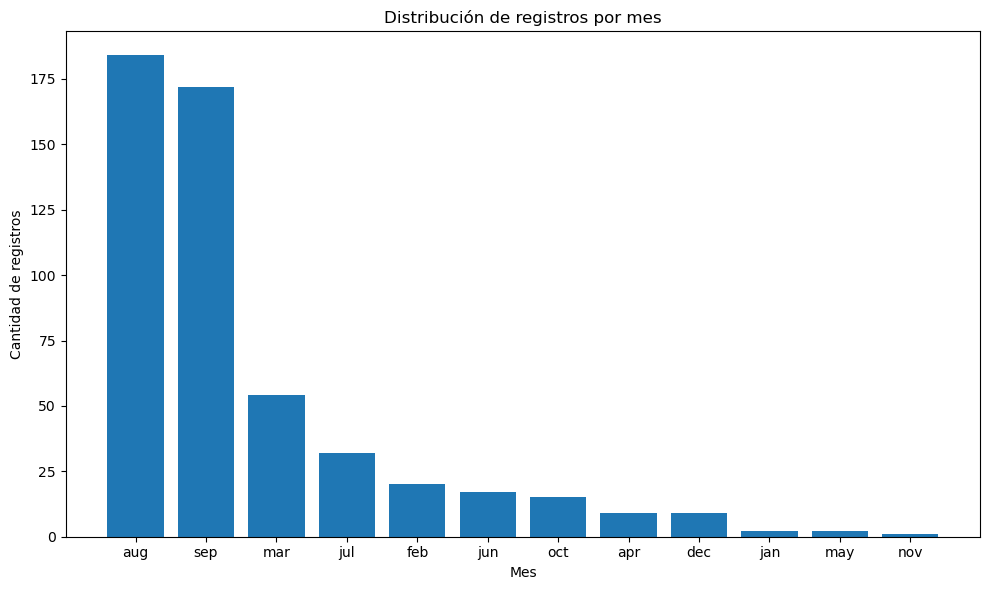

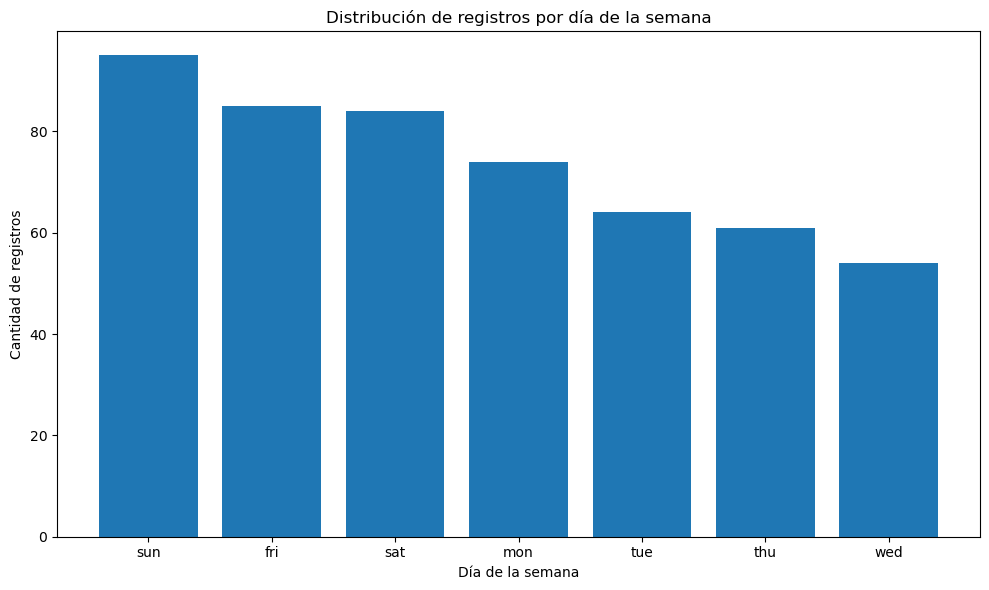

In [8]:
# Conteo de valores para la variable 'month'
month_counts = df_categoricas['month'].value_counts()

# Conteo de valores para la variable 'day'
day_counts = df_categoricas['day'].value_counts()

# Crear un array de posiciones para las barras
x_month = month_counts.index.values
x_day = day_counts.index.values

# Crear el gráfico de barras para la variable 'month'
plt.figure(figsize=(10, 6))
plt.bar(x_month, month_counts, tick_label=month_counts.index)
plt.xlabel('Mes')
plt.ylabel('Cantidad de registros')
plt.title('Distribución de registros por mes')
plt.tight_layout()
plt.show()

# Crear el gráfico de barras para la variable 'day'
plt.figure(figsize=(10, 6))
plt.bar(x_day, day_counts, tick_label=day_counts.index)
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de registros')
plt.title('Distribución de registros por día de la semana')
plt.tight_layout()
plt.show()

Estadísticos descriptivos básicos:
             FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain  
count  517.000000  517.000000  
mean     4.017602    0.021663  
std      1.791653    0.295959  
min      0.400000    0.000000  
25%      2.700000    0.000000  
50%      4.000000    0.000000  
75%      4.

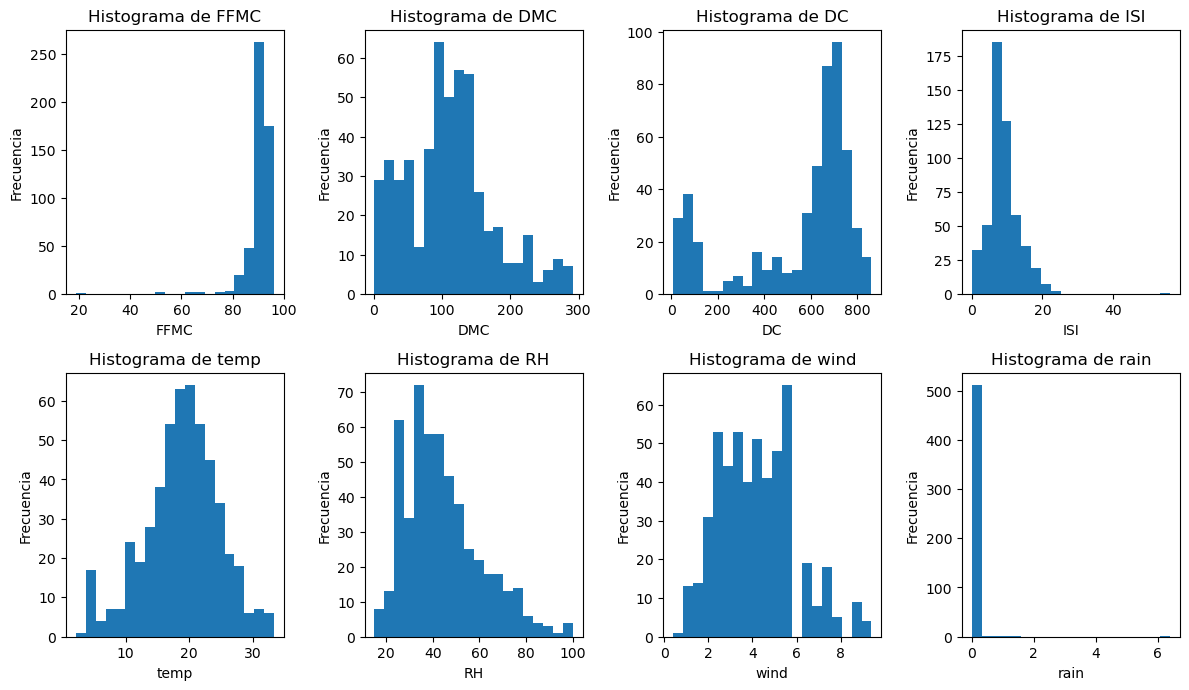

In [9]:
# Calcular estadísticos descriptivos básicos
estadisticos_descriptivos = df_numericas.describe()

# Mostrar estadísticos descriptivos
print("Estadísticos descriptivos básicos:")
print(estadisticos_descriptivos)

# Crear histograma para cada variable numérica
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_numericas.columns):
    plt.subplot(3, 4, i + 1)
    plt.hist(df_numericas[col], bins=20, range=(df_numericas[col].min(), df_numericas[col].max()))
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

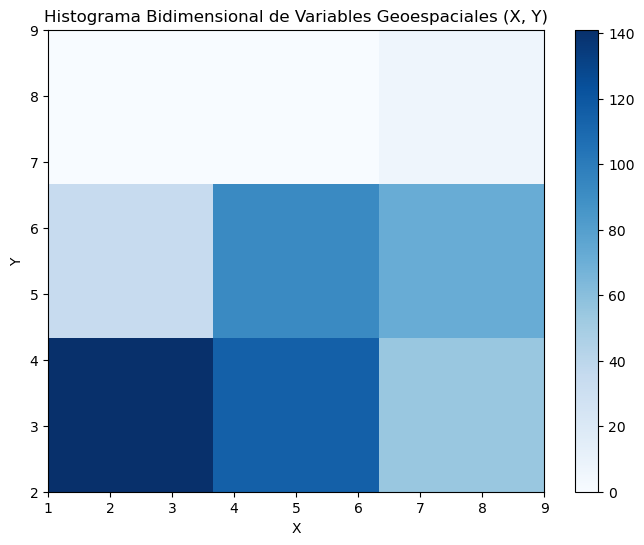

In [10]:
# Variables geoespaciales
x = df_geoespaciales['X']
Y = df_geoespaciales['Y']

# Crear un histograma bidimensional
plt.figure(figsize=(8, 6))
plt.hist2d(x, Y, bins=(3, 3), cmap='Blues')
plt.colorbar()
plt.title('Histograma Bidimensional de Variables Geoespaciales (X, Y)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

En las graficas de las variables categoricas se puede observar que los incendios surgen en mayor cantidad en los meses de verano agosto y septiembre. Respecto a los dias no se encuentran unas diferencias destacables aunque se ve por una pequeña diferencia que los dias mas frecuentes son los fines de semana

Observando las variables numéricas se pueden observar que diferentes variables como FFMC, ISI y rain presentan valores extremos que podrian influir en la realizacion de modelos de prediccion. Observando los valores de los estadisticos podemos extraer que existen variables donde la mediana y la media difieren considerablemente en sus valores y no seguirian una distribucion normal.

Con respecto a las variables geoespaciales, la hipotesis a priori es que donde mas incendios forestales se produce se encuentra en las coordenadas mas orientadas al sur del lugar.

## 2.2 Análisis exploratorio de los datos

En este apartado exploraremos la relación de los atributos descriptivos con la variable objetivo.
<br>
Nota: trataremos de forma diferente los atributos categóricos de los numéricos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada variable categórica, mostrad un gráfico donde superpondréis para cada categoría un histograma de los valores de la variable objetivo. Añadid una leyenda para saber a qué clase corresponde cada histograma
    
La finalidad es observar como se distribuye el valor de la variable objetivo en función de los valores de las categorías de cada variable categórica. De esta forma, identificaremos de manera visual y rápida si este atributo categórico está relacionado o no con diferentes valores de la respuesta.

<hr>
Sugerencia: podéis usar la función "hist" de la librería "matplotlib", así como su parámetro "alpha" (transparencia) para que se aprecien los histogramas superpuestos.
</div>

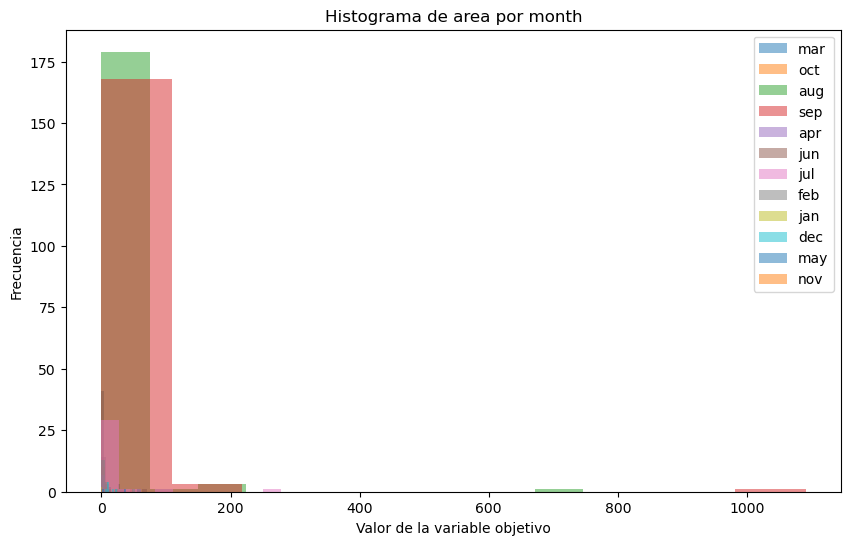

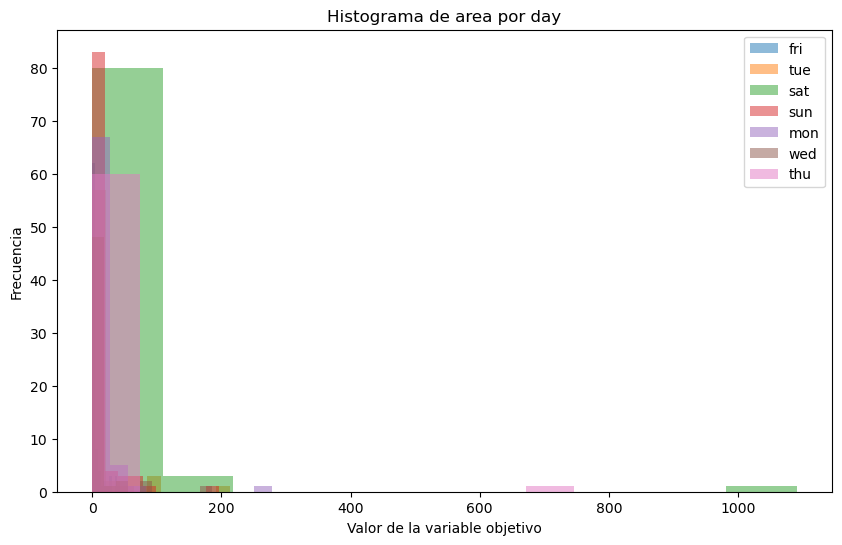

In [11]:
import matplotlib.pyplot as plt

# Suponiendo que la variable objetivo es 'area'
variable_objetivo = 'area'

# Variables categóricas
variables_categoricas = ['month', 'day']

# Crear gráficos de histogramas superpuestos para cada variable categórica
for categoria in variables_categoricas:
    # Obtener las categorías únicas en la variable categórica
    categorias_unicas = df_categoricas[categoria].unique()
    
    # Crear un histograma para cada categoría
    plt.figure(figsize=(10, 6))
    for cat_unica in categorias_unicas:
        plt.hist(df[df_categoricas[categoria] == cat_unica][variable_objetivo],
                 alpha=0.5, label=f'{cat_unica}')

    plt.xlabel('Valor de la variable objetivo')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {variable_objetivo} por {categoria}')
    plt.legend()
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los histogramas, ¿te parece que los atributos categóricos tendrán algún peso a la hora de predecir la variable objetivo? ¿Porqué? 
</div>

Observando los histogramas por separado, vemos como los meses de septiembre y agosto si pueden influir en la predicción de nuestro modelo.

En cambio, con los dias de la semana podemos ver que aparentemente no existe influencia relevante con la variable objetivo

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada categoría de las variables categóricas calculad los valores de media y desviación estandard de la variable objetivo. La finalidad de este ejercicio es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
<hr>
Sugerencia: podéis usar las funciones "mean" y "std" de la librería "numpy".
</div>

In [12]:
import numpy as np

# Variable objetivo
variable_objetivo = 'area'

# Variables categóricas
variables_categoricas = ['month', 'day']

# Calcular media y desviación estándar para cada categoría de las variables categóricas
for categoria in variables_categoricas:
    # Obtener las categorías únicas en la variable categórica
    categorias_unicas = df_categoricas[categoria].unique()
    
    print(f'Valores para la variable objetivo "{variable_objetivo}" agrupados por la categoría "{categoria}":\n')
    for cat_unica in categorias_unicas:
        valores_objetivo = df[df_categoricas[categoria] == cat_unica][variable_objetivo]
        media = np.mean(valores_objetivo)
        desviacion_estandar = np.std(valores_objetivo)
        
        print(f'Categoría "{categoria}" = {cat_unica}')
        print(f'Media de {variable_objetivo}: {media:.2f}')
        print(f'Desviación estándar de {variable_objetivo}: {desviacion_estandar:.2f}\n')


Valores para la variable objetivo "area" agrupados por la categoría "month":

Categoría "month" = mar
Media de area: 4.36
Desviación estándar de area: 9.06

Categoría "month" = oct
Media de area: 6.64
Desviación estándar de area: 13.23

Categoría "month" = aug
Media de area: 12.49
Desviación estándar de area: 60.20

Categoría "month" = sep
Media de area: 17.94
Desviación estándar de area: 87.39

Categoría "month" = apr
Media de area: 8.89
Desviación estándar de area: 18.79

Categoría "month" = jun
Media de area: 5.84
Desviación estándar de area: 16.38

Categoría "month" = jul
Media de area: 14.37
Desviación estándar de area: 50.05

Categoría "month" = feb
Media de area: 6.28
Desviación estándar de area: 12.03

Categoría "month" = jan
Media de area: 0.00
Desviación estándar de area: 0.00

Categoría "month" = dec
Media de area: 13.33
Desviación estándar de area: 6.23

Categoría "month" = may
Media de area: 19.24
Desviación estándar de area: 19.24

Categoría "month" = nov
Media de area: 0

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todos los atributos numéricos (incluyendo los geoespaciales) y la respuesta.
</div>

In [13]:
corr_var = df.drop(columns=["month", "day"]).corr()
corr_var.style.background_gradient(cmap='coolwarm').format(precision=2)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables numéricas del conjunto de datos (incluyendo las geoespaciales). La finalidad de este ejercicio es poder observar y analizar las correlaciones entre las variables de manera gráfica.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

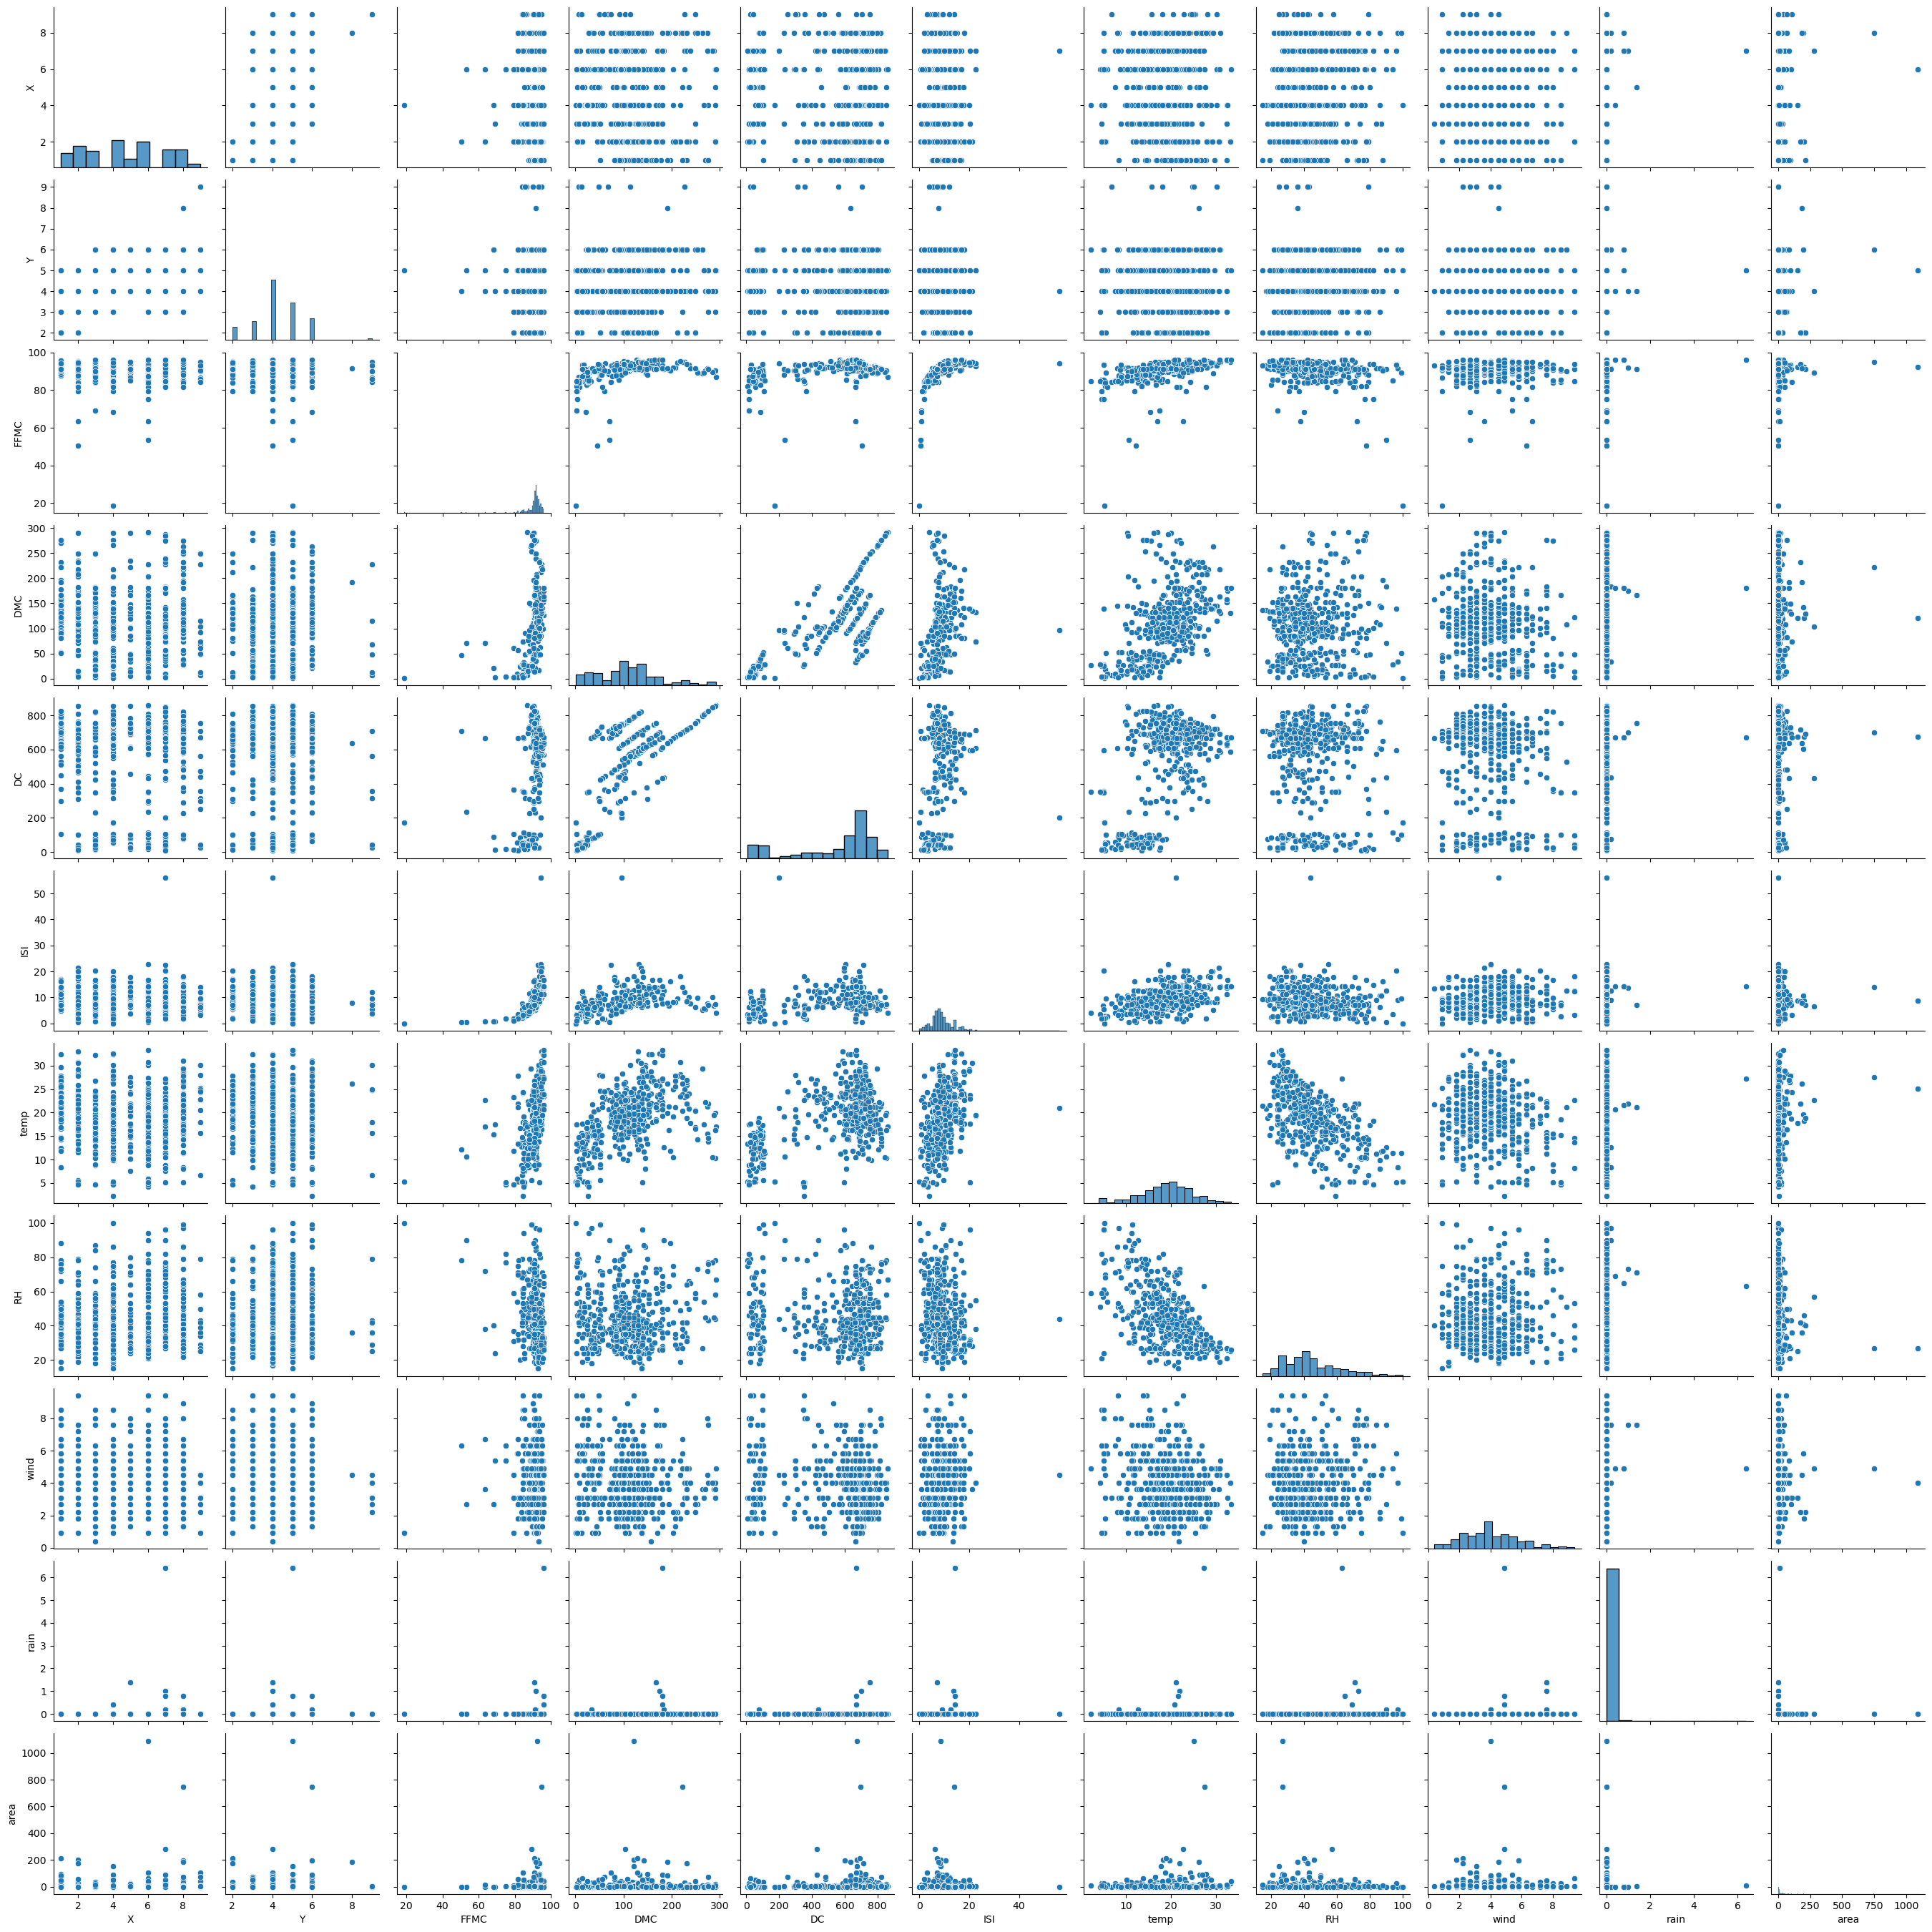

In [14]:
sns.pairplot(df.drop(columns=["month", "day"]))

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> identificad los 2 atributos que tienen una correlación más fuerte con la respuesta y los 3 con una correlación más débil (coeficiente de correlación mayor o menor en valor absoluto).
    
Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 5 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, en cada gráfico añadid la representación de una regresión lineal que fite los puntos.
        
<hr>Sugerencia: podéis usar la función "regplot" de la librería 'seaborn'.
</div>

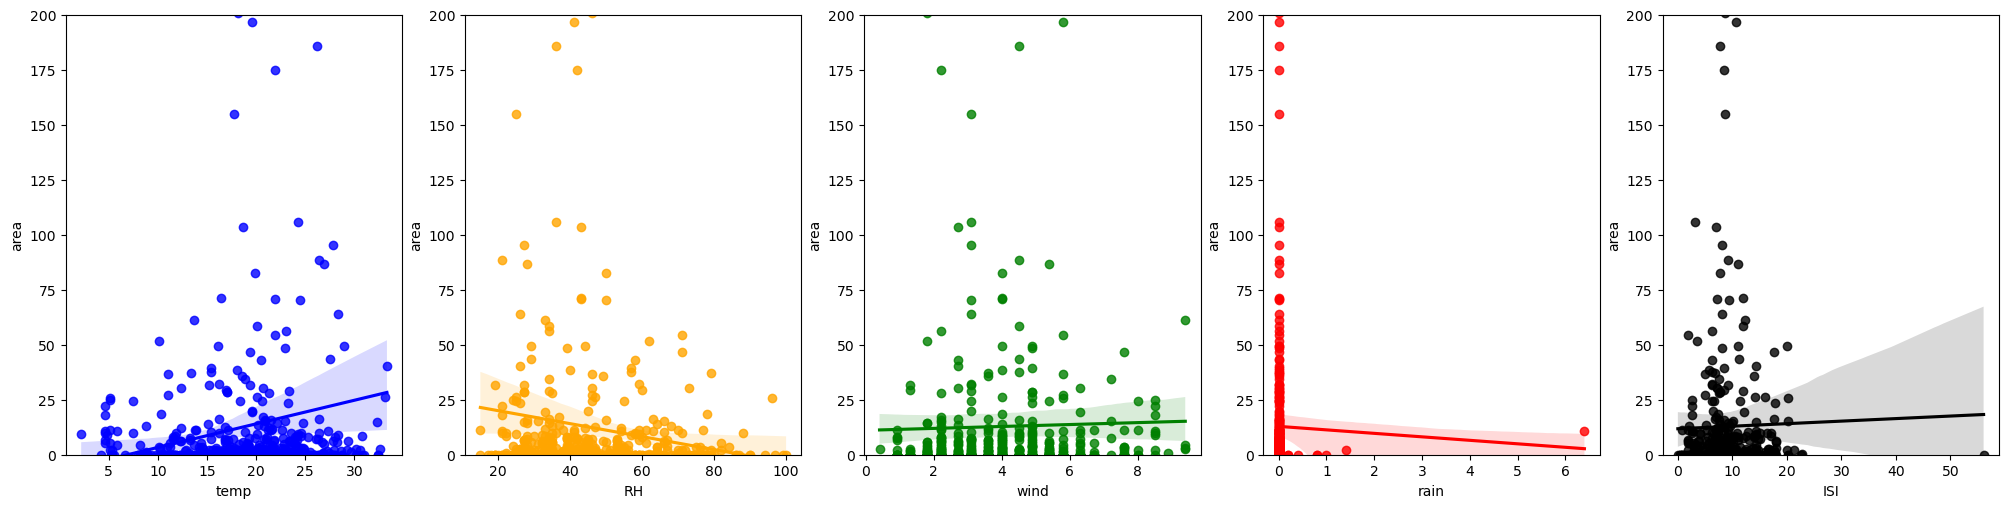

In [15]:
column_sels = ["temp", "RH", "wind", "rain", "ISI"]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
colors=["blue", "orange", "green", "red", "black"]
for i, k in enumerate(column_sels):
    ax = sns.regplot(y=df["area"], x=df[k], ax=axs[i], color=colors[i])
    ax.set_ybound(0, 200)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.
</div>

Observando los graficos podemos detectar que las correlaciones entre las variables "tempo" y "RH" son especialmente bajas, aunque la deteccion de areas quemada se observan en altas temperaturas y con baja humedad.

De la misma manera, en las variables que menos tienen correlacion tambien se detecta la escasez de correlacion.


# 3. Preprocesado de los datos (2.5 puntos)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores. En este apartado:
<li>Transformaremos las variables categóricas en varias variables binarias, una para cada categoría.</li>
<li>Estandarizaremos los valores de los atributos descriptivos para que sus escalas no sean muy diferentes.</li>
<li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elimina los atributos categóricos del conjunto de datos y en su lugar introduce la transformación de dichos atributos a tantas variables binarias como categorías tengan.
<hr>
Sugerencia: utilizad la función "get_dummies" de "pandas".
</div>

In [16]:
# Obtener variables binarias para las columnas categóricas
df_categoricas_binarias = pd.get_dummies(df_categoricas)

# Eliminar las columnas originales categóricas
X = X.drop(['month', 'day'], axis=1)

# Concatenar las variables binarias al DataFrame original
X = pd.concat([X, df_categoricas_binarias], axis=1)

# Visualizar el DataFrame resultante
print(X.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  month_apr  month_aug  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0          0          0   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0          0          0   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0          0          0   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2          0          0   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0          0          0   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          1   
4          0          0          0          0          0          1   

   month_may  month_nov  month_oct  month_sep  day_fri  day_mon  day_sat  \
0          0          

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> estandariza todos los atributos descriptivos.
<hr>
Sugerencia: utilizad "StandardScaler" de "preprocessing".
</div>

In [17]:
scaler = preprocessing.StandardScaler()
X_dummies_scaled = scaler.fit_transform(X)
X_dummies_scaled

array([[ 1.00831277,  0.56986043, -0.80595947, ..., -0.36574845,
        -0.37587279, -0.34151233],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -0.36574845,
         2.66047458, -0.34151233],
       [ 1.00831277, -0.24400101, -0.00810203, ..., -0.36574845,
        -0.37587279, -0.34151233],
       ...,
       [ 1.00831277, -0.24400101, -1.64008316, ..., -0.36574845,
        -0.37587279, -0.34151233],
       [-1.58736044, -0.24400101,  0.68095666, ..., -0.36574845,
        -0.37587279, -0.34151233],
       [ 0.57570057, -1.05786246, -2.02087875, ..., -0.36574845,
         2.66047458, -0.34151233]])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies_scaled,y)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica si la decisión de transformar el conjunto de datos (variables categóricas y estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es una buena idea.
</div>

En nuestro caso, es una buena practica debido a que es un paso a realizar en el preprocesamiento de los datos para prepararlos antes de alimentar a los modelos. el hecho de realizarlos en un paso previo a la division del conjunto nos aportaria una buena distribucion de los datos y evitar la fuga de datos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> En este ejercicio hemos estandarizado los valores de los atributos descriptivos para que sus escalas no sean muy diferentes. ¿Qué nos aporta estandarizar los atributos descriptivos? ¿hay alguna situación o escenario en la que sea imprescindible?
</div>

La estandarizacion nos aporta la transformacion de los datos para que tengan los mismos parametros que una distribucion normal estandar. De esta forma los algoritmos aprenden de manera mas facil los pesos de los paramentros independientemente de su rango y su escala.

Los escenarios donde la estandarizacion sea imprescindible serian aquellos donde las variables descriptivas se encuentran en una escala totalmente diferentes entre unos y otros. Esto afectaria al algoritmo en su sensibilidad a los cambios o introduccion de nuevas muestras

# 4. Reducción de la dimensionalidad (2.5 puntos)

Con el propósito de comprobar visualmente la distribución de la variable objetivo teniendo en cuenta todos los atributos descriptivos a la vez, vamos a reducir la dimensionalidad del problema a solamente dos atributos que serán la proyección de los atributos descriptivos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Generad un gráfico con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes x e y, el valor de la variable objetivo usando la escala de colores. El objetivo es visualizar la variación de la variable objetivo en función de los valores de las componentes principales generadas.</li>
</ul>
    
NOTA: cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

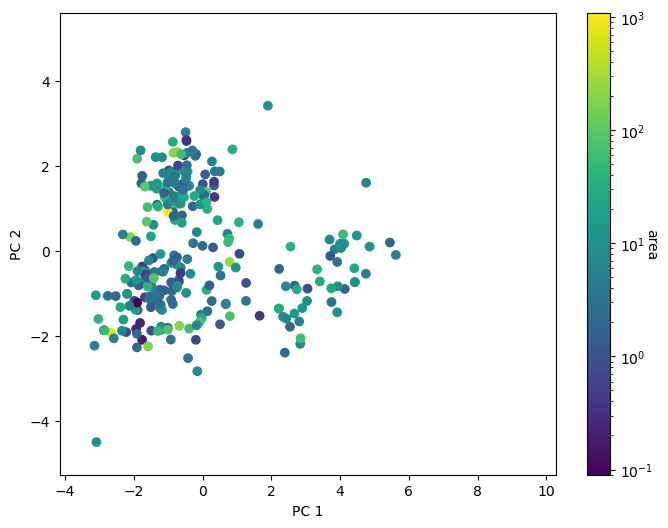

In [19]:
pca = PCA(n_components=2, random_state=seed)
X_PCA = pca.fit_transform(X_dummies_scaled)
area_values = y["area"].values

fig, ax = plt.subplots(1, 1, figsize=(8,6))
sc = ax.scatter(x=X_PCA[:,0], y=X_PCA[:,1], c=area_values, cmap='viridis', norm=matplotlib.colors.LogNorm())
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
cbr = plt.colorbar(sc)
cbr.set_label("area", rotation=270)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes x e y, el valor de la variable objetivo usando una escala de colores.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

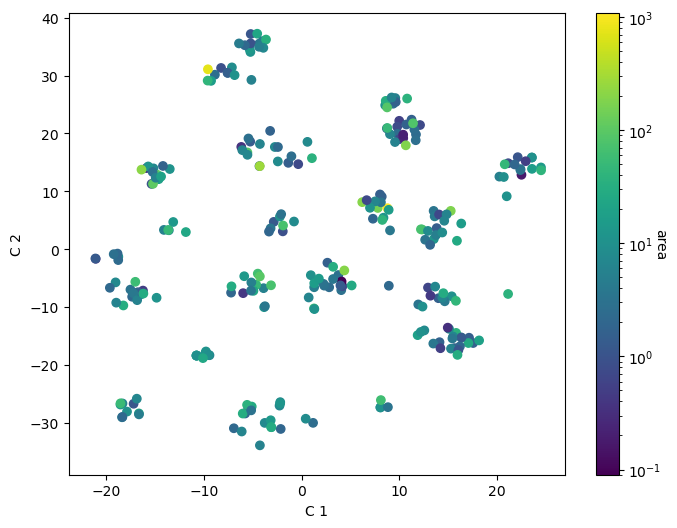

In [20]:
tsne = TSNE(n_components=2, random_state=seed, init='random', learning_rate='auto')
X_TSNE = tsne.fit_transform(X_dummies_scaled)

# Crear el gráfico de dispersión
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sc = ax.scatter(x=X_TSNE[:, 0], y=X_TSNE[:, 1], c=area_values, cmap='viridis', norm=matplotlib.colors.LogNorm())
ax.set_xlabel("C 1")
ax.set_ylabel("C 2")
cbr = plt.colorbar(sc)
cbr.set_label("area", rotation=270)

# Mostrar el gráfico
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación de la variable objetivo y visualizar diferenciadamente áreas de indendio grandes o pequeñas? ¿Si utilizásemos las 2 nuevas variables para predecir la variable objetivo, serían buenos los resultados obtenidos?
    
¿Por qué obtenemos resultados tan diferentes con los dos métodos?
</div>

La reduccion se ha creado correctamente pero no creo que haya funcionado bien. 
Ninguna de las dos dimensiones pueden explicar la variacion de la variable area.
Si utilizaramos las nuevas variables no conseguiriamos unos buenos resultados 

Los diferentes resultados al aplicar los algoritmos PCA y TSNE vienen por las caracteristicas y funcionamiento de cada una. En el algoritmo PCA la disminucuin de la dimensionaliddad se basa en la minimizacion de las distancias, mientras que el TSNE se basa en mantener las distancias entre los valores en altas y baja dimensionalidad.

# 5. Conjuntos desbalanceados de datos (2.5 puntos)

En los problemas de clasificación, es muy común encontrar conjuntos de datos muy desbalanceados. En la industria existen múltiples ejemplos, como la detección de fraude o la fuga de clientes. Por este motivo, este ejercicio se centra en el análisis de este tipo de conjuntos. 

Vamos a utilizar un conjunto de datos simplificado del data set <strong>Turbo Engine</strong> del [NASA Prognostics Center of Excellence Data Set Repository](https://data.phmsociety.org/nasa/), el cual sólo estará formado por dos características explicativas, y la variable objetivo, para así poder analizar visualmente el problema de manera sencilla. En este data set tenemos mediciones de los sensores de un motor cada cierto tiempo, siendo la variable objetivo el estado del motor, el cual indica si hay avería o no en el instante de la medición.

Vamos a comenzar cargando el conjunto de datos:

In [21]:
engine_df = pd.read_csv('Turbo_engine.csv', sep=';')
target_feat = 'y'
x1_feat = 'x_1'
x2_feat = 'x_2'

engine_df.head()

x_1    x_2  y
0    1  64182  0
1    2  64215  0
2    3  64235  0
3    4  64235  0
4    5  64237  0

A continuación, vamos a analizar la distribución de nuestro conjunto de datos. Para ello, utilizaremos la función <strong>show_distribution</strong>:

In [22]:
def show_distribution(df):
    freq = df[target_feat].value_counts()
    plt.pie(freq, labels=('No engine failure ('+str(freq[0])+')', 'Engine failure ('+str(freq[1])+')'), autopct='%1.1f%%')
    plt.title("Engine failure distribution")

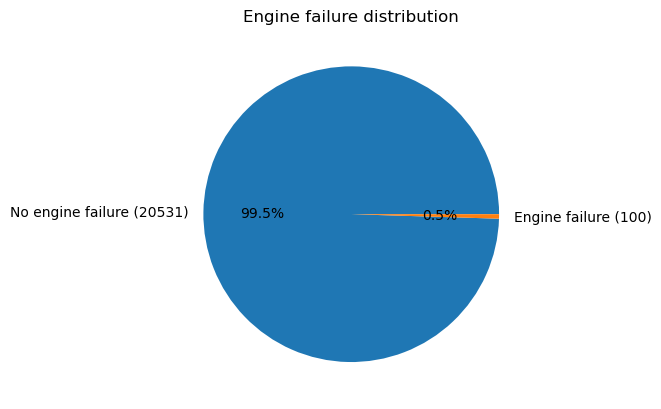

In [23]:
show_distribution(engine_df)

Cómo se puede observar, el conjunto está muy desbalanceado, ya que sólo 0.5% de las muestras se corresponden con una situación de avería en el motor.

Aprovechando que sólo tenemos dos características descriptivas, vamos a mostrar mediante un scatter plot nuestro conjunto de datos. Para ello utilizaremos la función <strong>plot_data</strong>. Esta función recibe tres parámetros:


<ul>
    <li>data_sets: Una lista de DataFrames a graficar. Cada uno debe contener las dos características descriptivas, y la clase, ("y", engine failure).</li>
    <li>only_failures: Parámetro booleano que indica si sólo queremos ver las averías del motor o por el contrario, todo el data set. En este último caso, además se mostrará la frontera de decisión de un clasificador lineal base.</li>
    <li>cmap: Valor del parámetro "cmap" para el scatter plot.</li>
</ul>

In [24]:
def plot_data(data_sets, only_failures=False, cmap='Paired'):

    if not isinstance(data_sets, list):
        data_sets = [data_sets]

    colors = np.array(["skyblue", "red"])
    fig, ax = plt.subplots(len(data_sets), 1, figsize=(12, 7 * len(data_sets)))

    for i, data in enumerate(data_sets):
        data = data if not only_failures \
            else data[data[target_feat] == 1]

        eff_ax = ax if len(data_sets) == 1 else ax[i]
        X = data[[x1_feat, x2_feat]].values
        y = data[target_feat].values

        if not only_failures:
            clf = LinearDiscriminantAnalysis()
            clf.fit(X, y)

            h = 2
            x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
            y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h

            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                                 np.arange(y_min, y_max, h))

            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            eff_ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
            eff_ax.contour(xx, yy, Z, colors='black', linewidths=0.7)

        eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')

C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')


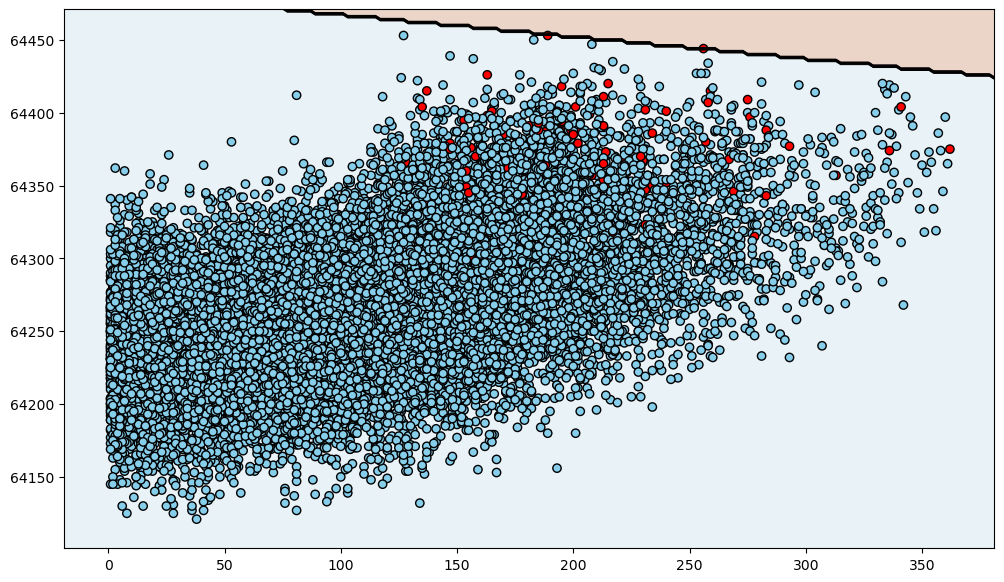

In [25]:
plot_data([engine_df], only_failures=False)

En la imagen anterior, se puede observar la distribución de nuestro conjunto de datos. Cómo ya habíamos analizado, hay muy pocas averías de motor (puntos rojos). En la imagen, además, se puede ver la frontera de decisión del clasificador base. Esta frontera nos permite ver las áreas que el modelo considera que son de una clase y las que considera que son de otra. Al poner encima los puntos vemos si los clasifica correctamente en el área que les corresponde. En este caso, la frontera divide el conjunto de datos en dos partes, teniendo sólo dos puntos en una de ellas (avería de motor, parte superior). 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿por qué motivo el clasificador podría estar haciendo esta división? ¿esta separación es más o menos eficiente que predecir siempre la clase 0, es decir, sin avería de motor? ¿qué métrica habría que utilizar en este tipo de problemas? Justificad todas las respuestas.
</div>

Esta clasificacion se debe a que la linea traza una division donde en la parte de arriba se encontrarian las averias en cualquier caso cumpliendose las caracteristicas. Debido a que las averias son en numero muy inferiores a las no averias ha trazado una linea favorecida a las no averias y asi minimizar el error de detectar no averias en vez de averias.

Seria un poco mas eficiente al medir la precision general del modelo, pero en el caso de buscar averias es podible que no identificaria menos o ninguna que en este caso.

Como queremos averiguar las averias reales, en nuestro caso habria que calcular la sensibilidad o la precision y que mediriamos la proporcion de positivos reales y minimizar los falsos positivos

Para abordar el problema de datos desbalanceados, vamos a analizar la técnica de sobremuestreo (oversampling) de la clase minoritaria. En la literatura hay más técnicas para abordar este problema, como el submuestreo (undersampling) de la clase mayoritaria, pero en esta PEC nos vamos a centrar sólo en esta técnica.

## 5.1 Oversampling

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> incrementad las muestras de la clase minoritaria hasta alcanzar un número similar de elementos que la clase mayoritaria, aplicando las siguientes técnicas:
<ul>
    <li>Duplicación aleatoria (random over-sampling), fijando random_state=10.</li>
    <li>SMOTE (Synthetic Minority Over-sampling Technique), fijando random_state=10.</li>
    <li>ADASYN (Adaptive Synthetic Sampling), fijando random_state=10.</li>
</ul>
    
Por último, comprobad el resultado de aplicar cada una de las técnicas utilizando la función <strong>show_distribution</strong>.
<hr>
Sugerencia: para aplicar la duplicación aleatoria podéis usar "RandomOverSampler" de imblearn.<br>
Sugerencia: para aplicar smote podéis usar "SMOTE" de imblearn.<br>
Sugerencia: para aplicar adasun podéis usar "ADASYN" de imblearn.<br>
</div>

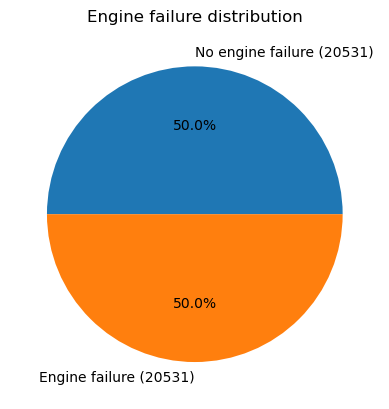

In [26]:
# Extraer las características y la columna de destino
X = engine_df[[x1_feat, x2_feat]]
y = engine_df[target_feat]

# Aplicar Random Over-sampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=10)
X_ros, y_ros = ros.fit_resample(X, y)


resampled_df = pd.DataFrame(data=X_ros, columns=[x1_feat, x2_feat])
resampled_df[target_feat] = y_ros

show_distribution(resampled_df)

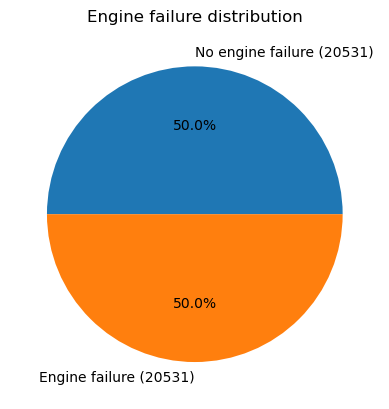

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

resampled_smote_df = pd.DataFrame(data=X_resampled_smote, columns=[x1_feat, x2_feat])
resampled_smote_df[target_feat] = y_resampled_smote

show_distribution(resampled_smote_df)


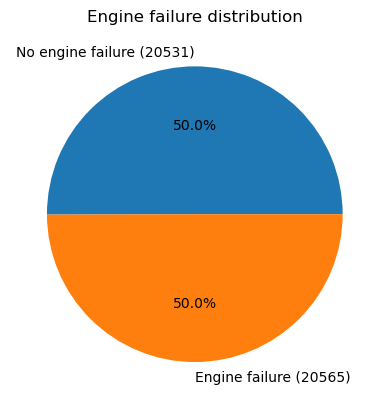

In [28]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=10)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X, y)

resampled_adasyn_df = pd.DataFrame(data=X_resampled_adasyn, columns=[x1_feat, x2_feat])
resampled_adasyn_df[target_feat] = y_resampled_adasyn

show_distribution(resampled_adasyn_df)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> graficad las averías del conjunto de datos original y el obtenido al aplicar Random Over Sampling, utilizando la función <strong>plot_data</strong> con el parámetro "only_failures" fijado a True.
</div>

C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')


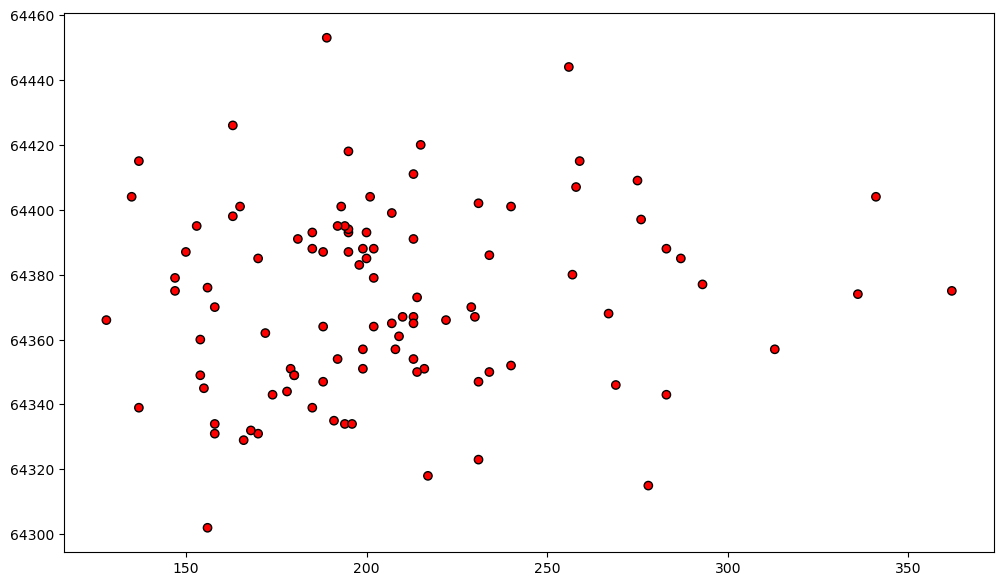

In [29]:
plot_data(engine_df, only_failures=True, cmap='Paired')

C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')


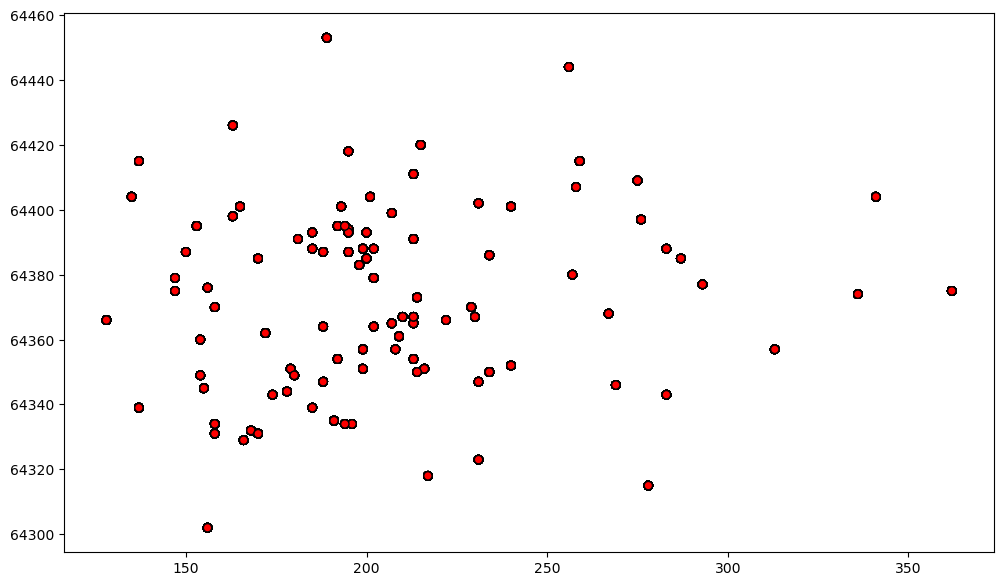

In [30]:
plot_data(resampled_df, only_failures=True, cmap='Paired')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿qué diferencias y similitudes encuentras en las dos imágenes anteriores? Razonad la respuesta teniendo en cuenta la distribución de ambos conjuntos, es decir, el número de averías de motor.
</div>

Como podemos observar, las imagenes son casi identicas. Para poder ver la diferencia hay que observar el contorno de los puntos de la grafica no original donde se percibe que los puntos son un poco mas gruesos.

Esto se debe a que, al realizar el incremento de averias con el metodo de duplicación aleatoria, éste se ha fijado en las caracteristicas que tienen las averias del conjunto de datos original y las ha copiado hasta llegar al punto de 50 % averias y 50% no averias

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> graficad las averías del conjunto de datos original y el obtenido al aplicar Random Over Sampling, utilizando la función <strong>plot_data</strong> con el parámetro "only_failures" fijado a False.
</div>

C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')
C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')


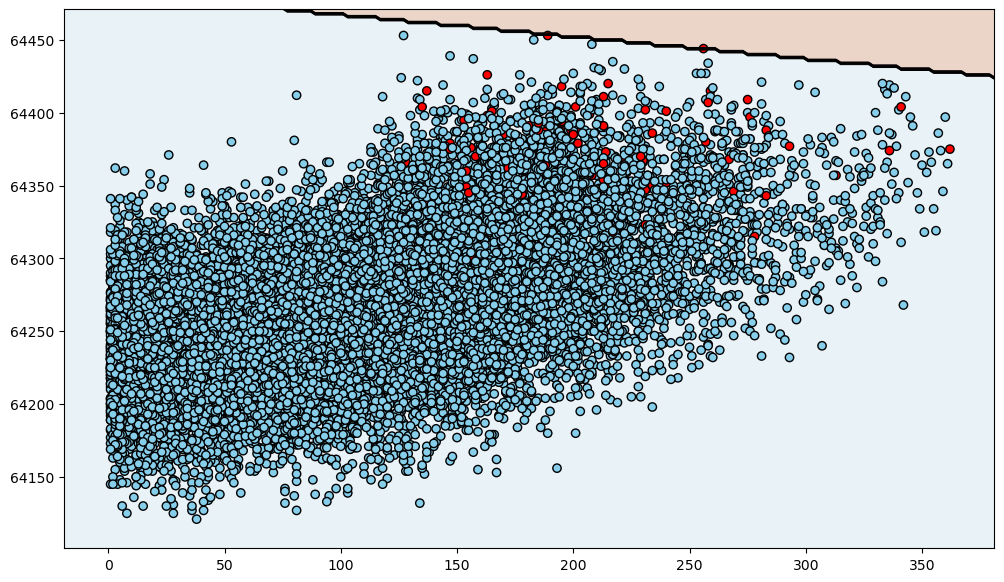

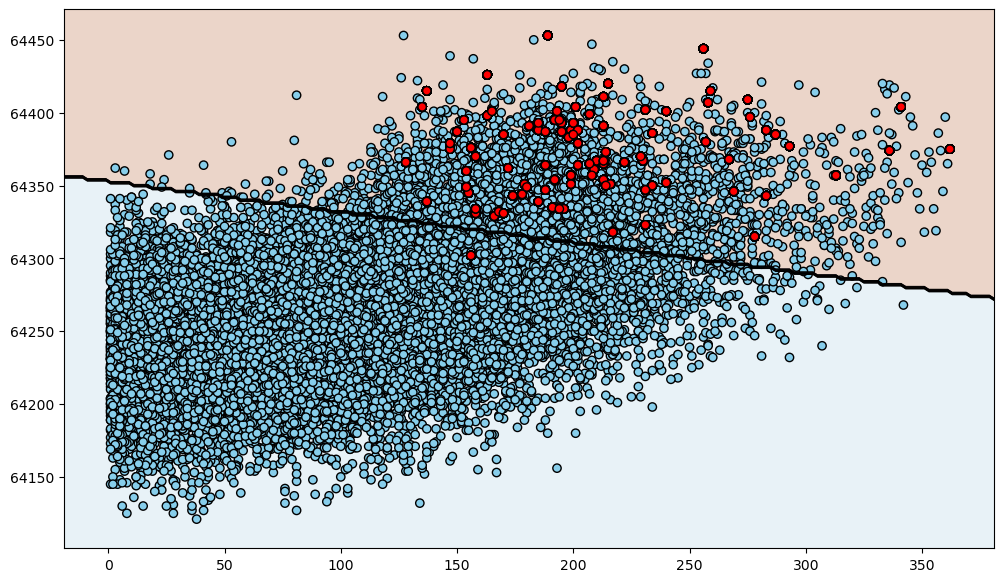

In [31]:
plot_data(engine_df, only_failures=False, cmap='Paired')
plot_data(resampled_df, only_failures=False, cmap='Paired')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Teniendo en cuenta el análisis anterior, ¿qué ha pasado con la frontera de decisión? ¿por qué?
</div>

Como las averias ya igualan a las no averias la linea se ha desplazado hacia abajo (ampliado la zona de deteccion) para mejorar el modelo para detectar los verdaderos positivos del conjunto de datos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> graficad las averías de los tres conjuntos de datos obtenidos al aplicar las tres técnicas de sobremuestreo, utilizando la función <strong>plot_data</strong> con el parámetro "only_failures" fijado a True.
</div>

C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')
C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')
C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')


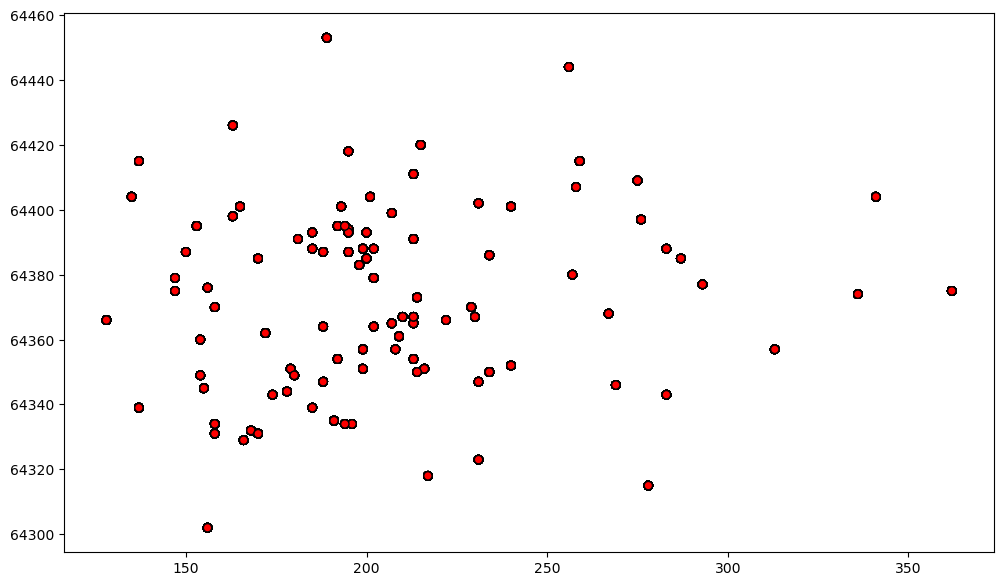

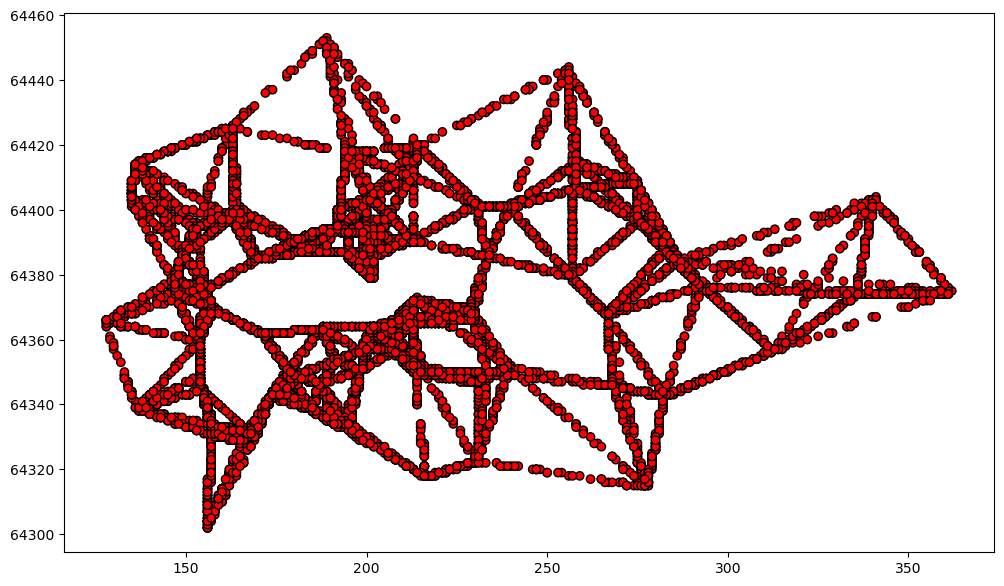

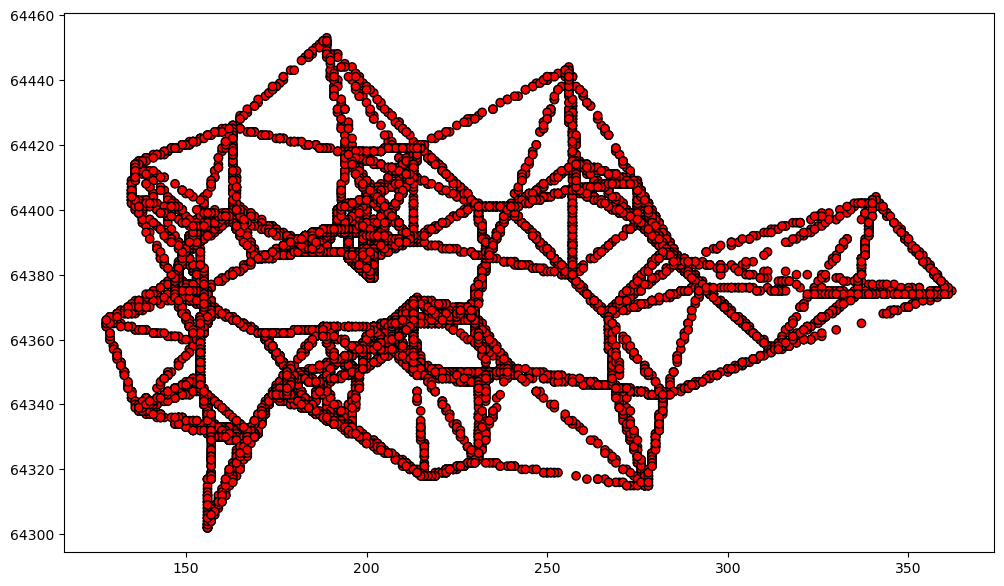

In [32]:
plot_data(resampled_df, only_failures=True, cmap='Paired')
plot_data(resampled_smote_df, only_failures=True, cmap='Paired')
plot_data(resampled_adasyn_df, only_failures=True, cmap='Paired')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Teniendo en cuenta el número de muestras con avería de motor en cada conjunto, comentad las diferencias y similitudes en las imágenes del ejercicio anterior. Justificad la respuesta teniendo en cuenta el comportamiento de cada una de las técnicas utilizadas.
</div>

Las diferencias de las tres graficas se deben a como las diferentes tecnicas que se han utilizada para desbalancear el conjunto funcionan:

En la primera imagen con la duplicacion de los valores lo que ha hecho ha sido copiar las caracteristicas de las averias y duplicarlas hasta llegar al 50 % cambiando los valores solo en pocos grados segun los originales.

En la segunda imagen. Las averias originales han sido conectadas con las averias ficticias creadas a partir del algoritmo SMOTE. Esto se debe a que crea las averias nuevas (datos nuevos) en funcion de la linealidad que se presentan entre las averias del conjunto real.

La tercera imagen es practicamente parecida a la segunda cambiando algunos puntos en ellas. Esto se debe a que el algorimo ADASYN funciona parecido a SMOTE pero tiene en cuentra la densidad de los puntos a predecir de los datos originales. Esto quiere decir que crea mas averias en las zonas donde se congregan mas averias en el conjunto original y menos donde menos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> graficad las averías de los tres conjuntos de datos obtenidos al aplicar las tres técnicas de sobremuestreo, utilizando la función <strong>plot_data</strong> con el parámetro "only_failures" fijado a False.
</div>

C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')
C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')
C:\Users\jlara\AppData\Local\Temp\ipykernel_10440\4157333226.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  eff_ax.scatter(X[:,0], X[:,1], c=colors[y], cmap=cmap, edgecolors='k')


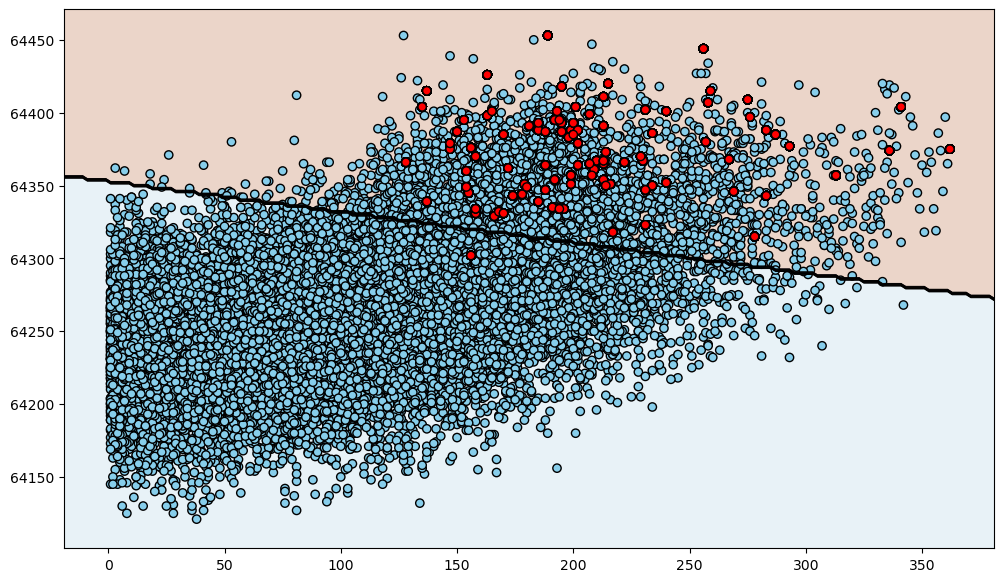

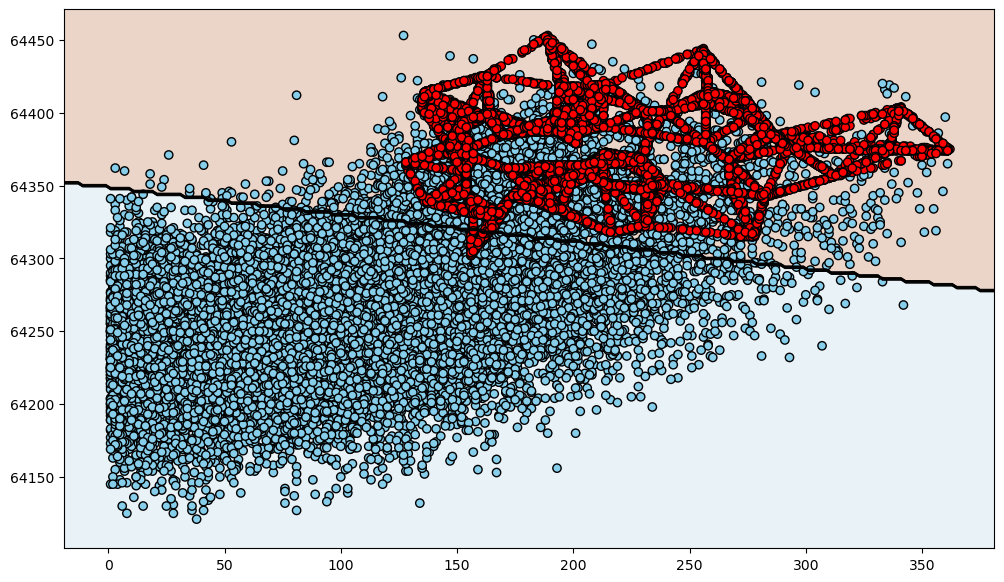

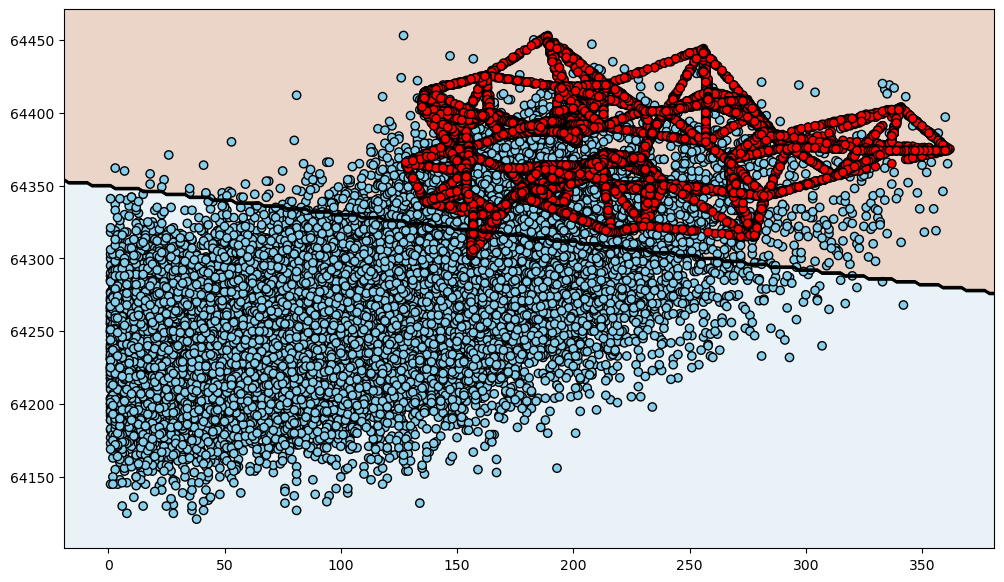

In [33]:
plot_data(resampled_df, only_failures=False, cmap='Paired')
plot_data(resampled_smote_df, only_failures=False, cmap='Paired')
plot_data(resampled_adasyn_df, only_failures=False, cmap='Paired')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Teniendo en cuenta el análisis anterior, ¿qué ha pasado con la frontera de decisión? ¿por qué? Tened en cuenta que el clasificador base utilizado es lineal.
</div>

Las fronteras de decision han cambiado en las 3 imagenes con respecto a la original debido a que han sido introducidos nuevos puntos ficticios (averias). De esta manera el algoritmo ha desplazado la frontera de decision para obtener el mayor de verdaderos positivos en los 3 casos.

Añadiendo comentario sobre las imagenes, se puede observar que las fronteras de SMOTE y ADASYN son ligeramente diferentes a la de duplicidades ya que en ADASYN ha creado mas puntos donde existen mas averias en el conjunto original y menos donde menos. Por este motivo, la frontera de dicesion de este grafico se encuentra un poco mas recogida hacia arriba.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Para finalizar el ejercicio, imaginad que tenéis que abordar un problema de clasificación binario desbalanceado y utilizáis la técnica SMOTE para balancear el conjunto. ¿esta técnica se debería aplicar antes o después de dividir el conjunto en entrenamiento/validación/test? ¿por qué? Justifica la respuesta.
</div>

La tecnica SMOTE se deberia de realizar despues de dividir el conjunto original para que la evaluacion del modelo sea mas realista. Esto se debe a que debemos entrenar al modelo con los datos originales y despues poner en practica con datos nuevos que no haya reconocido o no se encuentren en el conjunto original.

Del mismo modo, es posible que exista una fuga de datos debido a que algunos de estos nuevos puntos creados por SMOTE se basen en puntos que ya existan en el conjunto de validacion o test.